## Exploratory Data Analysis

In [76]:
import importlib
import bootstrap
import os, sys
importlib.reload(bootstrap)

PROJECT_ROOT = "/cluster/work/eliasls/tdt17/task4"
if PROJECT_ROOT not in sys.path:
  sys.path.append(PROJECT_ROOT)
  
from utils import exploratory_data_analysis
importlib.reload(exploratory_data_analysis)
import cv2
import matplotlib.pyplot as plt
import yaml 
import xml.etree.ElementTree as ET
import pandas as pd

### A look at the dataset

In [77]:
DATA_ROOT = "/cluster/projects/vc/courses/TDT17/other/Football2025"
root_dir = os.path.join(DATA_ROOT, "")
print("root_dir:", root_dir)
print("contents:", os.listdir(root_dir))

root_dir: /cluster/projects/vc/courses/TDT17/other/Football2025/
contents: ['RBK-HamKam', 'RBK-AALESUND', 'RBK-VIKING', 'RBK-BODO', 'RBK-FREDRIKSTAD']


The datasets consits of five Rosenborg Ball Klubb matches with different oppnents

### Data per match

In [78]:
match = "RBK-HamKam"
match_dir = os.path.join(DATA_ROOT, match)
print("match_dir:", match_dir)
print("contents:", os.listdir(match_dir))

match_dir: /cluster/projects/vc/courses/TDT17/other/Football2025/RBK-HamKam
contents: ['rbk_hamkam_cvat_overlay.mp4', 'labels', 'data', 'data.yaml', 'annotations.xml', 'train.txt', 'rbk_hamkam.mp4']


Data for a match consits of: 
* labels
* data
* data.yaml
* annotations.xml
* train.txt
* rbk_hamkam.mp4
* rbk_hamkam_cvat_overlay.mp4 

### Labels

In [79]:
labels = "labels/train"
labels_dir = os.path.join(match_dir, labels)
print("labels_dir:", labels_dir)
print("contents:", os.listdir(labels_dir))

frame_dir = os.path.join(labels_dir, "frame_000189.txt")
print(frame_dir)

exploratory_data_analysis.print_lines_in_file(str(frame_dir), 10)


labels_dir: /cluster/projects/vc/courses/TDT17/other/Football2025/RBK-HamKam/labels/train
contents: ['frame_000189.txt', 'frame_000775.txt', 'frame_001011.txt', 'frame_000036.txt', 'frame_001500.txt', 'frame_000760.txt', 'frame_000185.txt', 'frame_001153.txt', 'frame_000654.txt', 'frame_000083.txt', 'frame_001180.txt', 'frame_000594.txt', 'frame_000816.txt', 'frame_001492.txt', 'frame_000723.txt', 'frame_001340.txt', 'frame_000433.txt', 'frame_000323.txt', 'frame_000587.txt', 'frame_001116.txt', 'frame_000649.txt', 'frame_001242.txt', 'frame_001299.txt', 'frame_000603.txt', 'frame_000277.txt', 'frame_000752.txt', 'frame_001148.txt', 'frame_000933.txt', 'frame_000655.txt', 'frame_001390.txt', 'frame_000635.txt', 'frame_000229.txt', 'frame_001283.txt', 'frame_000677.txt', 'frame_001221.txt', 'frame_001035.txt', 'frame_000066.txt', 'frame_000739.txt', 'frame_000975.txt', 'frame_000174.txt', 'frame_001479.txt', 'frame_001059.txt', 'frame_001255.txt', 'frame_001410.txt', 'frame_000682.txt',

### Data

Inside **/labels/train** there are txt files for each frame. **NB: write about whats inside frame_xxxxxx.txt**

match_dir: /cluster/projects/vc/courses/TDT17/other/Football2025/RBK-HamKam/data/images/train
contents: ['frame_000867.png', 'frame_001403.png', 'frame_001144.png', 'frame_001498.png', 'frame_001198.png', 'frame_000320.png', 'frame_000444.png', 'frame_000601.png', 'frame_001160.png', 'frame_000919.png', 'frame_001166.png', 'frame_000875.png', 'frame_000833.png', 'frame_001213.png', 'frame_000791.png', 'frame_000351.png', 'frame_000939.png', 'frame_000387.png', 'frame_000986.png', 'frame_001183.png', 'frame_000653.png', 'frame_001087.png', 'frame_001107.png', 'frame_001054.png', 'frame_000832.png', 'frame_000010.png', 'frame_001170.png', 'frame_001258.png', 'frame_000706.png', 'frame_000512.png', 'frame_000680.png', 'frame_000081.png', 'frame_001333.png', 'frame_001321.png', 'frame_000283.png', 'frame_000158.png', 'frame_000065.png', 'frame_001044.png', 'frame_000888.png', 'frame_001344.png', 'frame_000669.png', 'frame_001151.png', 'frame_001076.png', 'frame_001117.png', 'frame_001447.p

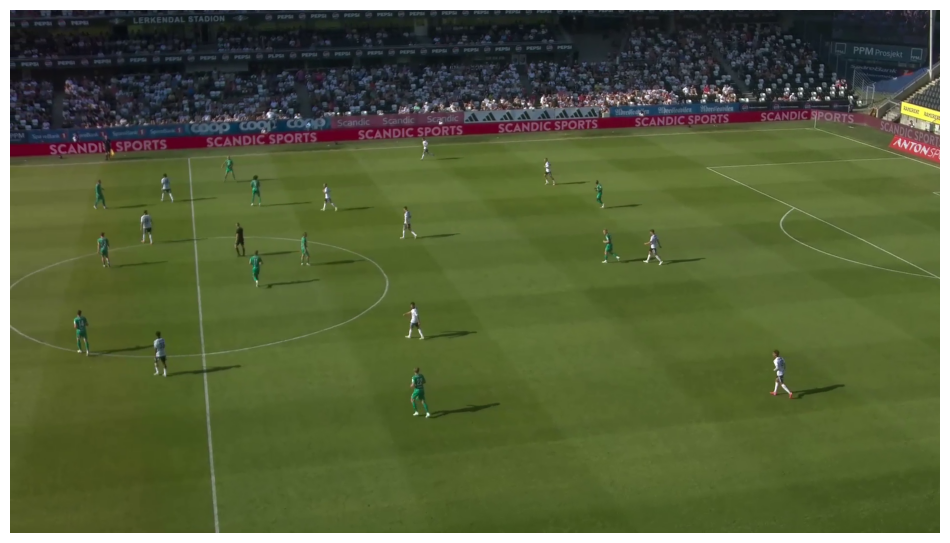

In [80]:
train_images = "data/images/train"
data_dir = os.path.join(match_dir, train_images)
print("match_dir:", data_dir)
print("contents:", os.listdir(data_dir))

image = "frame_000867.png"
image_path = os.path.join(data_dir, image)

img = cv2.imread(str(image_path))           
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      

plt.figure(figsize=(12, 7))  # width, height in inches
plt.imshow(img)
plt.axis("off")
plt.show()


data/images/train are the frames from the video of the match (rbk_hamkam.mp4), and they have .png format. 

### data.yaml

In [6]:
data_yaml = "data.yaml"
data_yaml_path = os.path.join(match_dir, data_yaml)
print("match_dir:", data_yaml_path)

with open(data_yaml_path, "r") as f:
    data_cfg = yaml.safe_load(f)

print(data_cfg)

match_dir: /cluster/projects/vc/courses/TDT17/other/Football2025/RBK-HamKam/data.yaml
{'names': {0: 'player', 1: 'ball', 2: 'event_labels'}, 'path': '.', 'train': 'train.txt'}


**NB:** Write about what this is!

### annotations.xml

In [7]:
annotation = "annotations.xml"
annotation_xml_path = os.path.join(match_dir, annotation)


tree = ET.parse(annotation_xml_path)
root = tree.getroot()

original_size_el = root.find("./meta/task/original_size")
frame_width = frame_height = None
if original_size_el is not None:
    width_el = original_size_el.find("width")
    height_el = original_size_el.find("height")
    if width_el is not None and width_el.text:
        frame_width = int(float(width_el.text))
    if height_el is not None and height_el.text:
        frame_height = int(float(height_el.text))

tracks = []

for track_el in root.findall("track"):
    track_id = int(track_el.get("id")) if track_el.get("id") is not None else None
    track_label = track_el.get("label")
    track_name = track_el.get("name")

    boxes = []
    for box_el in track_el.findall("box"):
        box_data = {
            "frame": int(box_el.get("frame")),
            "keyframe": box_el.get("keyframe") == "1",
            "outside": box_el.get("outside") == "1",
            "occluded": box_el.get("occluded") == "1",
            "z_order": int(box_el.get("z_order", 0)),
            "xtl": float(box_el.get("xtl")),
            "ytl": float(box_el.get("ytl")),
            "xbr": float(box_el.get("xbr")),
            "ybr": float(box_el.get("ybr")),
        }

        attr_values = {}
        for attr_el in box_el.findall("attribute"):
            attr_name = attr_el.get("name")
            if attr_name:
                attr_values[attr_name] = attr_el.text
        if attr_values:
            box_data["attributes"] = attr_values

        boxes.append(box_data)

    tracks.append({
        "id": track_id,
        "label": track_label,
        "name": track_name,
        "frame_width": frame_width,
        "frame_height": frame_height,
        "boxes": boxes,
    })

from pprint import pprint

print("root tag:", root.tag)
print("num tracks:", len(tracks))
pprint(tracks[0])

print([child.tag for child in root])


root tag: annotations
num tracks: 28
{'boxes': [{'attributes': {'team': 'home'},
            'frame': 174,
            'keyframe': True,
            'occluded': False,
            'outside': False,
            'xbr': 1920.0,
            'xtl': 1904.04,
            'ybr': 407.97,
            'ytl': 359.97,
            'z_order': 0},
           {'attributes': {'team': 'home'},
            'frame': 175,
            'keyframe': True,
            'occluded': False,
            'outside': False,
            'xbr': 1919.0,
            'xtl': 1893.0,
            'ybr': 413.0,
            'ytl': 361.0,
            'z_order': 0},
           {'attributes': {'team': 'home'},
            'frame': 176,
            'keyframe': True,
            'occluded': False,
            'outside': False,
            'xbr': 1918.0,
            'xtl': 1885.0,
            'ybr': 415.0,
            'ytl': 358.0,
            'z_order': 0},
           {'attributes': {'team': 'home'},
            'frame': 177,
        

**annotation.xml** is the CVAT (Computer Vision Annotation Tool) export for the match video. Its defines every object class, 

Object classes: 
* **player**
* **ball**
* **event_labels**

original_size

A track tells which frames an object is present in. For each frame the object is present, the box entry includes:
* **frame: X** - the frame index within the video.
* **keyframe: 0/1** – 1 if this sample is a keyframe used for interpolation, 0 if it was interpolated.
    * **keyframe="1":** the annotator explicitly drew/edited the box on that frame; it anchors the track.
    * **keyframe="0":** CVAT auto-generated the box by interpolating between surrounding keyframes, so it wasn’t manually adjusted.
* **outside**: 0/1 – 1 means the object is marked as outside the frame starting here; 0 means it remains visible.
* **occluded: 0/1** – 1 indicates the object is partially hidden/occluded; 0 means fully visible.
* **xtl – “x top-left”:** the horizontal pixel coordinate of the box’s upper-left corner.
* **ytl – “y top-left”:** the vertical coordinate of that same corner.
* **xbr – “x bottom-right”:** the horizontal pixel coordinate of the lower-right corner.
* **ybr – “y bottom-right”:** the vertical coordinate of the lower-right corner.
* **attribute children** – per-frame metadata such as team=home, team=away, etc., depending on the label’s attribute schema.


### train.txt

In [8]:
train = "train.txt"
train_path = os.path.join(match_dir, train)
exploratory_data_analysis.print_lines_in_file(str(train_path), 10)

hade
data/images/train/frame_000000.png
data/images/train/frame_000001.png
data/images/train/frame_000002.png
data/images/train/frame_000003.png
data/images/train/frame_000004.png
data/images/train/frame_000005.png
data/images/train/frame_000006.png
data/images/train/frame_000007.png
data/images/train/frame_000008.png
data/images/train/frame_000009.png


A list of image paths to use for training.

### Video files 
#### rbk_hamkam.mp4

In [9]:
import shutil
from IPython.display import Video

src = "/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-HamKam/rbk_hamkam.mp4"
dst = "rbk_hamkam.mp4"

if not os.path.exists(dst):
    shutil.copy(src, dst)

Video(dst, embed=False, width=640)

#### rbk_hamkam_cvat_overlay.mp4

In [ ]:
#src = "/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-HamKam/rbk_hamkam_cvat_overlay.mp4"
dst = "rbk_hamkam_cvat_overlay_web.mp4"


""" if not os.path.exists(dst):
    shutil.copy(src, dst) """

#Video(dst, embed=False, width=640)

In [40]:
#src = "/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-AALESUND/aalesund_cvat_overlay.mp4"
dst = "aalesund_cvat_overlay_web.mp4"

""" if not os.path.exists(dst):
    shutil.copy(src, dst) """

Video(dst, embed=False, width=640)

match_dir: /cluster/projects/vc/courses/TDT17/other/Football2025/RBK-AALESUND/data/images/train
contents: ['frame_000874.png', 'frame_001320.png', 'frame_000743.png', 'frame_000229.png', 'frame_001575.png', 'frame_001063.png', 'frame_001735.png', 'frame_001224.png', 'frame_000918.png', 'frame_001461.png', 'frame_000023.png', 'frame_000744.png', 'frame_000077.png', 'frame_000502.png', 'frame_000026.png', 'frame_001265.png', 'frame_000165.png', 'frame_000171.png', 'frame_001044.png', 'frame_000727.png', 'frame_000690.png', 'frame_000567.png', 'frame_001473.png', 'frame_001417.png', 'frame_001095.png', 'frame_000810.png', 'frame_001405.png', 'frame_000001.png', 'frame_000257.png', 'frame_001290.png', 'frame_001242.png', 'frame_000979.png', 'frame_001424.png', 'frame_000653.png', 'frame_000605.png', 'frame_001146.png', 'frame_000107.png', 'frame_001136.png', 'frame_001772.png', 'frame_001360.png', 'frame_001545.png', 'frame_000360.png', 'frame_000509.png', 'frame_000310.png', 'frame_000301

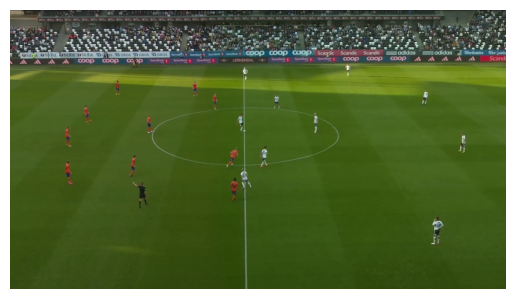

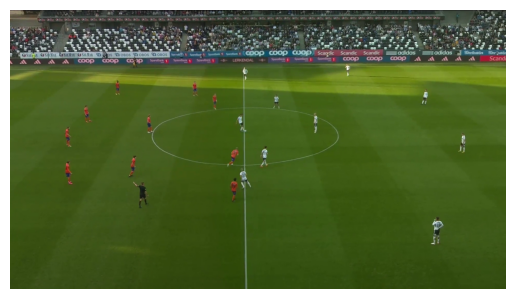

In [41]:
train_images = "data/images/train"
data_dir = os.path.join("/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-AALESUND", train_images)
print("match_dir:", data_dir)
print("contents:", os.listdir(data_dir))

image = "frame_000120.png"
image_path = os.path.join(data_dir, image)

img = cv2.imread(str(image_path))           
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      

plt.imshow(img)
plt.axis("off")
plt.show()

image = "frame_000121.png"
image_path = os.path.join(data_dir, image)

img = cv2.imread(str(image_path))           
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      

plt.imshow(img)
plt.axis("off")
plt.show()

#### Number of frames in each match


In [10]:
matches = sorted(os.listdir(root_dir))
print(matches)
#sorted(os.listdir())



['RBK-AALESUND', 'RBK-BODO', 'RBK-FREDRIKSTAD', 'RBK-HamKam', 'RBK-VIKING']


In [11]:
paths = exploratory_data_analysis.generate_paths(root_dir, matches)
paths

{'RBK-AALESUND': {'images': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-AALESUND/data/images/train',
  'labels': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-AALESUND/labels/train',
  'annotations': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-AALESUND/annotations.xml',
  'data_yaml': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-AALESUND/data.yaml'},
 'RBK-BODO-PART1': {'images': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-BODO/part1/RBK_BODO_PART1/data/images/train',
  'labels': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-BODO/part1/RBK_BODO_PART1/labels/train',
  'annotations': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-BODO/part1/RBK_BODO_PART1/annotations.xml',
  'data_yaml': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-BODO/part1/RBK_BODO_PART1/data.yaml'},
 'RBK-BODO-PART2': {'images': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-BODO/part2/RBK_BODO_P

#### Make sure data isent corrupt, contains any obvious artifacts and is readable


In [13]:
match_images = {}

for key in paths.keys():
  images_path = paths[key]["images"]
  #print(f"Path: {images_path}")
  match_images[key] = sorted(os.listdir(images_path))

In [ ]:
corrupt_status_per_match = {}
for match in match_images.keys():
  bad_files, blackish = exploratory_data_analysis.check_corrupts_and_artifacts(match_images[match], paths[match]["images"])
  corrupt_status_per_match[match] = [bad_files, blackish]


In [26]:
for key in corrupt_status_per_match.keys():
  print(f"{key}:")
  print(f"badfiles: {corrupt_status_per_match[key][0]}")
  print(f"blackish: {corrupt_status_per_match[key][1]}")

RBK-AALESUND:
badfiles: []
blackish: []
RBK-BODO-PART1:
badfiles: []
blackish: []
RBK-BODO-PART2:
badfiles: []
blackish: []
RBK-BODO-PART3:
badfiles: []
blackish: []
RBK-FREDRIKSTAD:
badfiles: []
blackish: []
RBK-HamKam:
badfiles: []
blackish: []
RBK-VIKING:
badfiles: []
blackish: []


&rarr; No match has images that cant be opened or blacj-ish images. So far we can use every image in every match. 

#### Check for missing labels

In [ ]:
for key in paths.keys():
  missing_labels = exploratory_data_analysis.get_missing_labels(match_images[key], paths[key]["labels"])
  print(f"{key} missing labels: {missing_labels}")



RBK-AALESUND missing labels: ['frame_001802']
RBK-BODO-PART1 missing labels: ['frame_001504', 'frame_001505']
RBK-BODO-PART2 missing labels: ['frame_001502', 'frame_001503']
RBK-BODO-PART3 missing labels: ['frame_001138', 'frame_001496']
RBK-FREDRIKSTAD missing labels: ['frame_001816']
RBK-HamKam missing labels: ['frame_001523']
RBK-VIKING missing labels: ['frame_001523']


Some images in every match dont have labels.

&rarr; dont include these in training, valdition or test

#### Check image sizes

In [15]:
importlib.reload(exploratory_data_analysis)
results = exploratory_data_analysis.check_original_sizes(paths)
results

{'RBK-AALESUND': {'status': 'ok',
  'width': '1920',
  'height': '1080',
  'path': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-AALESUND/annotations.xml'},
 'RBK-BODO-PART1': {'status': 'ok',
  'width': '1920',
  'height': '1080',
  'path': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-BODO/part1/RBK_BODO_PART1/annotations.xml'},
 'RBK-BODO-PART2': {'status': 'ok',
  'width': '1920',
  'height': '1080',
  'path': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-BODO/part2/RBK_BODO_PART2/annotations.xml'},
 'RBK-BODO-PART3': {'status': 'ok',
  'width': '1920',
  'height': '1080',
  'path': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-BODO/part3/RBK_BODO_PART3/annotations.xml'},
 'RBK-FREDRIKSTAD': {'status': 'mismatch',
  'width': '1280',
  'height': '720',
  'path': '/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-FREDRIKSTAD/annotations.xml'},
 'RBK-HamKam': {'status': 'ok',
  'width': '1920',
  'height': '1080',
  'path': '

Image resolution check. We parsed all annotations.xml files to read the fields.

* RBK-AALESUND, RBK-BODO (all parts), RBK-HamKam, RBK-VIKING: 1920×1080
* RBK-FREDRIKSTAD: 1280×720

--> Need resizing strategy 

**Check some sample to verify resolution:**

In [41]:
importlib.reload(exploratory_data_analysis)
for match in paths.keys():
    sizes = exploratory_data_analysis.sample_image_sizes(match, paths, n=5)
    print(match, sizes)

RBK-AALESUND [('frame_000874.png', 1920, 1080), ('frame_001320.png', 1920, 1080), ('frame_000743.png', 1920, 1080), ('frame_000229.png', 1920, 1080), ('frame_001575.png', 1920, 1080)]
RBK-BODO-PART1 [('frame_000874.png', 1920, 1080), ('frame_001320.png', 1920, 1080), ('frame_000743.png', 1920, 1080), ('frame_000229.png', 1920, 1080), ('frame_001063.png', 1920, 1080)]
RBK-BODO-PART2 [('frame_000874.png', 1920, 1080), ('frame_001320.png', 1920, 1080), ('frame_000743.png', 1920, 1080), ('frame_000229.png', 1920, 1080), ('frame_001063.png', 1920, 1080)]
RBK-BODO-PART3 [('frame_000874.png', 1920, 1080), ('frame_001320.png', 1920, 1080), ('frame_000743.png', 1920, 1080), ('frame_000229.png', 1920, 1080), ('frame_001063.png', 1920, 1080)]
RBK-FREDRIKSTAD [('frame_000874.png', 1280, 720), ('frame_001320.png', 1280, 720), ('frame_000743.png', 1280, 720), ('frame_000229.png', 1280, 720), ('frame_001575.png', 1280, 720)]
RBK-HamKam [('frame_000867.png', 1920, 1080), ('frame_001403.png', 1920, 108

The samples match with annotations.xml

All sequences are 16:9 (either 1920×1080 or 1280×720). Therefore aspect ratios are consistent, and we don’t need special handling for very wide/tall samples.


#### Object sizes

In [16]:
importlib.reload(exploratory_data_analysis)
stats = []

for name, path_dict in paths.items():
    rel_areas, abs_areas = exploratory_data_analysis.collect_bbox_areas(
        path_dict["annotations"]
    )
    if not rel_areas:   
        continue

    stats.append({
        "sequence": name,
        "num_boxes": len(rel_areas),
        "min_rel_area": min(rel_areas),
        "max_rel_area": max(rel_areas),
        "mean_rel_area": sum(rel_areas) / len(rel_areas),
        "min_abs_area": min(abs_areas),
        "max_abs_area": max(abs_areas),
        "mean_abs_area": sum(abs_areas) / len(abs_areas),
    })


pd.DataFrame(stats)



,sequence,num_boxes,min_rel_area,max_rel_area,mean_rel_area,min_abs_area,max_abs_area,mean_abs_area
0,RBK-AALESUND,42324,0.000014,0.004545,0.000920,30.0000,9424.0000,1906.803175
1,RBK-BODO-PART1,35589,0.000027,0.005309,0.001045,56.0000,11009.0000,2166.537798
2,RBK-BODO-PART2,36030,0.000024,0.006784,0.000889,49.0000,14067.0333,1844.292987
3,RBK-BODO-PART3,34307,0.000030,0.008522,0.001223,63.0000,17671.9420,2535.602617
4,RBK-FREDRIKSTAD,42863,0.000008,0.007782,0.001056,7.3408,7172.2280,973.563657
5,RBK-HamKam,35346,0.000008,0.006620,0.000882,17.0000,13728.0000,1828.395866
6,RBK-VIKING,35555,0.000017,0.006180,0.000932,36.0000,12814.0000,1933.438151



Matches contain between **34307** - **42863** boxes.
* &rarr; so annotations are dense; training can leverage plenty of samples per match.

Mean relative area per box is ~0.09–0.12 % of the frame, and maxima never exceed 0.85 %, minimums drop to 0.0008 %. Confirms that the task is dominated by tiny objects.
* &rarr; downscaling images would obliterate signals.

Absolute areas average only 1–2.5 k px, with RBK-Fredrikstad even smaller ~974 px mean.
* &rarr; need for high-resolution inputs, multi-scale/FPN backbones that preserve fine detail, and anchor grids biased toward small boxes.

RBK-Fredrikstad sticks out: lowest min and mean absolute area plus the only 720p video; without equalizing, a detector trained on 1080p clips might underperform there. 
* &rarr; Consider resolution-aware augmentations or upscaling that sequence.

Since every match spans similar numbers of boxes but differs slightly in scale distributions, ensure train/val splits cover all matches to avoid domain gaps.


In [46]:
importlib.reload(exploratory_data_analysis)


class_stats_per_match = []
for name, path_dict in paths.items():
    player, referee, ball, event_labels = exploratory_data_analysis.load_cvat_track(path_dict["annotations"])
    total =  player + referee +  ball + event_labels
    class_stats_per_match.append({
        "match": name, 
        "player": player,
        "referee": referee,
        "ball": ball,
        "event_labels": event_labels,
        "total": total
    })
    
pd_class = pd.DataFrame(class_stats_per_match)
pd_class

    

/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-AALESUND/annotations.xml
/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-BODO/part1/RBK_BODO_PART1/annotations.xml
/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-BODO/part2/RBK_BODO_PART2/annotations.xml
/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-BODO/part3/RBK_BODO_PART3/annotations.xml
/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-FREDRIKSTAD/annotations.xml
/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-HamKam/annotations.xml
/cluster/projects/vc/courses/TDT17/other/Football2025/RBK-VIKING/annotations.xml


,match,player,referee,ball,event_labels,total
0,RBK-AALESUND,37014,3604,1662,44,42324
1,RBK-BODO-PART1,30978,3107,1504,0,35589
2,RBK-BODO-PART2,30980,3578,1472,0,36030
3,RBK-BODO-PART3,29976,3033,1246,52,34307
4,RBK-FREDRIKSTAD,37521,3818,1478,46,42863
5,RBK-HamKam,31101,2992,1253,0,35346
6,RBK-VIKING,31077,3046,1432,0,35555


Almost the same per class distribution across matches. 

In [54]:
sums = pd_class.sum(0, numeric_only=True)
sums

player          228647
referee          23178
ball             10047
event_labels       142
total           262014
dtype: int64

In [60]:
total = sums["total"]
total_int = int(total)




In [75]:
aalesund = pd_class.loc[0, "total"]
bodo = pd_class.loc[1, "total"] + pd_class.loc[2, "total"] + pd_class.loc[3, "total"]
fredrikstad = pd_class.loc[4, "total"]
hamkam = pd_class.loc[5, "total"]
viking = pd_class.loc[6, "total"]

train = bodo + viking + hamkam
val = fredrikstad
test = aalesund

print(train/total_int)
print(val/total_int)
print(test/total_int)

0.6748761516560183
0.16359049516438054
0.1615333531796011


Based on this the dataset is split into: 
* **Train:** bodø1 + bodø2 + bodø3 + viking + hamkam (67%)
* **Val:** fredrikstad (16%) - bcause of 720p
* **test:** aalesund (16%)
